In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


In [2]:
n = 99
a, b, c, p = 1, 10, 1, 1

A = np.matrix(np.zeros((n + 1, n + 1)))
i, j = np.indices(A.shape)
A[i==j + 1] = a
A[i==j] = b
A[i==j - 1] = c
A[n, j] = p

f = np.matrix(np.zeros((n + 1, 1)))
k, l = np.indices(f.shape)
f[k, 0] = k + 1

A

matrix([[10.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1., 10.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1., 10., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 10.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1., 10.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [3]:
def normVector(v):
    return np.linalg.norm(v)

def __calcResidual(A, f, X):
    r = np.matrix(np.zeros((n + 1, 1)))
    r = A * X - f
    
    return r

def calcResidual(A, f, X):
    return normVector(__calcResidual(A, f, X))

In [4]:
def makePlot(y, title):
    plt.figure(figsize=(20, 10))

    x = np.arange(len(y))
    plt.plot(x, y, 'o--')
    plt.xlabel(r'$ iteration $', fontsize=16)
    plt.ylabel(r'$ ||r|| $', fontsize=16)

    plt.title(title, fontsize=16)
    plt.grid()
    #plt.legend(fontsize=16)
    plt.show()

## Gauss

In [5]:
def solveGauss(A, f, n):
    A = np.matrix(A)
    f = np.matrix(f)

    for j in range(n):
        max_ind = j + np.argmax(np.abs(A[j:, j]))
        if max_ind != j:
            A[j, :], A[max_ind, :] = np.copy(A[max_ind, :]), np.copy(A[j, :])
            f[j, :], f[max_ind, :] = np.copy(f[max_ind, :]), np.copy(f[j, :])

        for i in range(j + 1, n + 1):
            frac = A[i, j] / A[j, j]
            #print(frac)
            A[i, :] -= A[j, :] * frac
            f[i, :] -= f[j, :] * frac
    
    if np.any(np.isclose(np.diag(A), 0.0)):
        raise Exception("Infinite number of solutions!")

    X = np.matrix(np.zeros((n + 1, 1)))
    for i in range(n, -1, -1):
        X[i, 0] = (f[i, 0] - A[i, i:] * X[i:, 0]) / A[i, i]

    return X

In [6]:
solution = solveGauss(A, f, n)
solution

/tmp/ipykernel_22336/1085303398.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i, 0] = (f[i, 0] - A[i, i:] * X[i:, 0]) / A[i, i]


matrix([[ 8.33333333e-02],
        [ 1.66666667e-01],
        [ 2.50000000e-01],
        [ 3.33333333e-01],
        [ 4.16666667e-01],
        [ 5.00000000e-01],
        [ 5.83333333e-01],
        [ 6.66666667e-01],
        [ 7.50000000e-01],
        [ 8.33333333e-01],
        [ 9.16666667e-01],
        [ 1.00000000e+00],
        [ 1.08333333e+00],
        [ 1.16666667e+00],
        [ 1.25000000e+00],
        [ 1.33333333e+00],
        [ 1.41666667e+00],
        [ 1.50000000e+00],
        [ 1.58333333e+00],
        [ 1.66666667e+00],
        [ 1.75000000e+00],
        [ 1.83333333e+00],
        [ 1.91666667e+00],
        [ 2.00000000e+00],
        [ 2.08333333e+00],
        [ 2.16666667e+00],
        [ 2.25000000e+00],
        [ 2.33333333e+00],
        [ 2.41666667e+00],
        [ 2.50000000e+00],
        [ 2.58333333e+00],
        [ 2.66666667e+00],
        [ 2.75000000e+00],
        [ 2.83333333e+00],
        [ 2.91666667e+00],
        [ 3.00000000e+00],
        [ 3.08333333e+00],
 

In [7]:
calcResidual(A, f, solution)

1.0883946155170226e-13

## LU-decomposition

In [8]:
def __decomposeLU(A):
    P, L, U = scipy.linalg.lu(A)

    L = np.matrix(L)
    U = np.matrix(U)
    return np.matrix(L), np.matrix(U)

def solveLU(A, f, n):
    A = np.matrix(A)
    f = np.matrix(f)
    L, U = __decomposeLU(A)

    Y = np.matrix(np.zeros((n + 1, 1)))

    for i in range(n + 1):
        Y[i, 0] = f[i] - L[i, :i] * Y[:i]

    X = np.matrix(np.zeros((n + 1, 1)))

    for i in range(n, -1, -1):
        X[i, 0] = (Y[i] - U[i, i:] * X[i:, 0]) / U[i, i]

    return X
    

In [9]:
solution = solveLU(A, f, n)
solution

/tmp/ipykernel_22336/1046170112.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, 0] = f[i] - L[i, :i] * Y[:i]
/tmp/ipykernel_22336/1046170112.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i, 0] = (Y[i] - U[i, i:] * X[i:, 0]) / U[i, i]


matrix([[ 8.33333333e-02],
        [ 1.66666667e-01],
        [ 2.50000000e-01],
        [ 3.33333333e-01],
        [ 4.16666667e-01],
        [ 5.00000000e-01],
        [ 5.83333333e-01],
        [ 6.66666667e-01],
        [ 7.50000000e-01],
        [ 8.33333333e-01],
        [ 9.16666667e-01],
        [ 1.00000000e+00],
        [ 1.08333333e+00],
        [ 1.16666667e+00],
        [ 1.25000000e+00],
        [ 1.33333333e+00],
        [ 1.41666667e+00],
        [ 1.50000000e+00],
        [ 1.58333333e+00],
        [ 1.66666667e+00],
        [ 1.75000000e+00],
        [ 1.83333333e+00],
        [ 1.91666667e+00],
        [ 2.00000000e+00],
        [ 2.08333333e+00],
        [ 2.16666667e+00],
        [ 2.25000000e+00],
        [ 2.33333333e+00],
        [ 2.41666667e+00],
        [ 2.50000000e+00],
        [ 2.58333333e+00],
        [ 2.66666667e+00],
        [ 2.75000000e+00],
        [ 2.83333333e+00],
        [ 2.91666667e+00],
        [ 3.00000000e+00],
        [ 3.08333333e+00],
 

In [10]:
calcResidual(A, f, solution)

7.868591628900475e-14

## Seidel

In [11]:
def solveSeidel(A, f, n, delta_th):
    A = np.matrix(A)
    f = np.matrix(f)
    
    X = np.matrix(np.zeros((n + 1, 1)))
    rs = list()

    while True:
        prev_X = np.matrix(X)

        for i in range(n + 1):
            X[i] = (f[i] - (A[i, :i] * X[:i] + A[i, i+1:] * X[i+1:])) / A[i, i]

        rs.append(calcResidual(A, f, X))
        if normVector(X - prev_X) < delta_th:
            break
    
    return X, np.array(rs)

In [12]:
solution, rs = solveSeidel(A, f, n, 1e-5)
solution

matrix([[ 8.33333337e-02],
        [ 1.66666667e-01],
        [ 2.50000000e-01],
        [ 3.33333334e-01],
        [ 4.16666667e-01],
        [ 5.00000001e-01],
        [ 5.83333334e-01],
        [ 6.66666667e-01],
        [ 7.50000001e-01],
        [ 8.33333334e-01],
        [ 9.16666667e-01],
        [ 1.00000000e+00],
        [ 1.08333333e+00],
        [ 1.16666667e+00],
        [ 1.25000000e+00],
        [ 1.33333333e+00],
        [ 1.41666667e+00],
        [ 1.50000000e+00],
        [ 1.58333333e+00],
        [ 1.66666667e+00],
        [ 1.75000000e+00],
        [ 1.83333333e+00],
        [ 1.91666667e+00],
        [ 2.00000000e+00],
        [ 2.08333333e+00],
        [ 2.16666667e+00],
        [ 2.25000000e+00],
        [ 2.33333333e+00],
        [ 2.41666667e+00],
        [ 2.50000000e+00],
        [ 2.58333333e+00],
        [ 2.66666667e+00],
        [ 2.75000000e+00],
        [ 2.83333333e+00],
        [ 2.91666667e+00],
        [ 3.00000000e+00],
        [ 3.08333333e+00],
 

In [13]:
calcResidual(A, f, solution)

4.078813365623585e-06

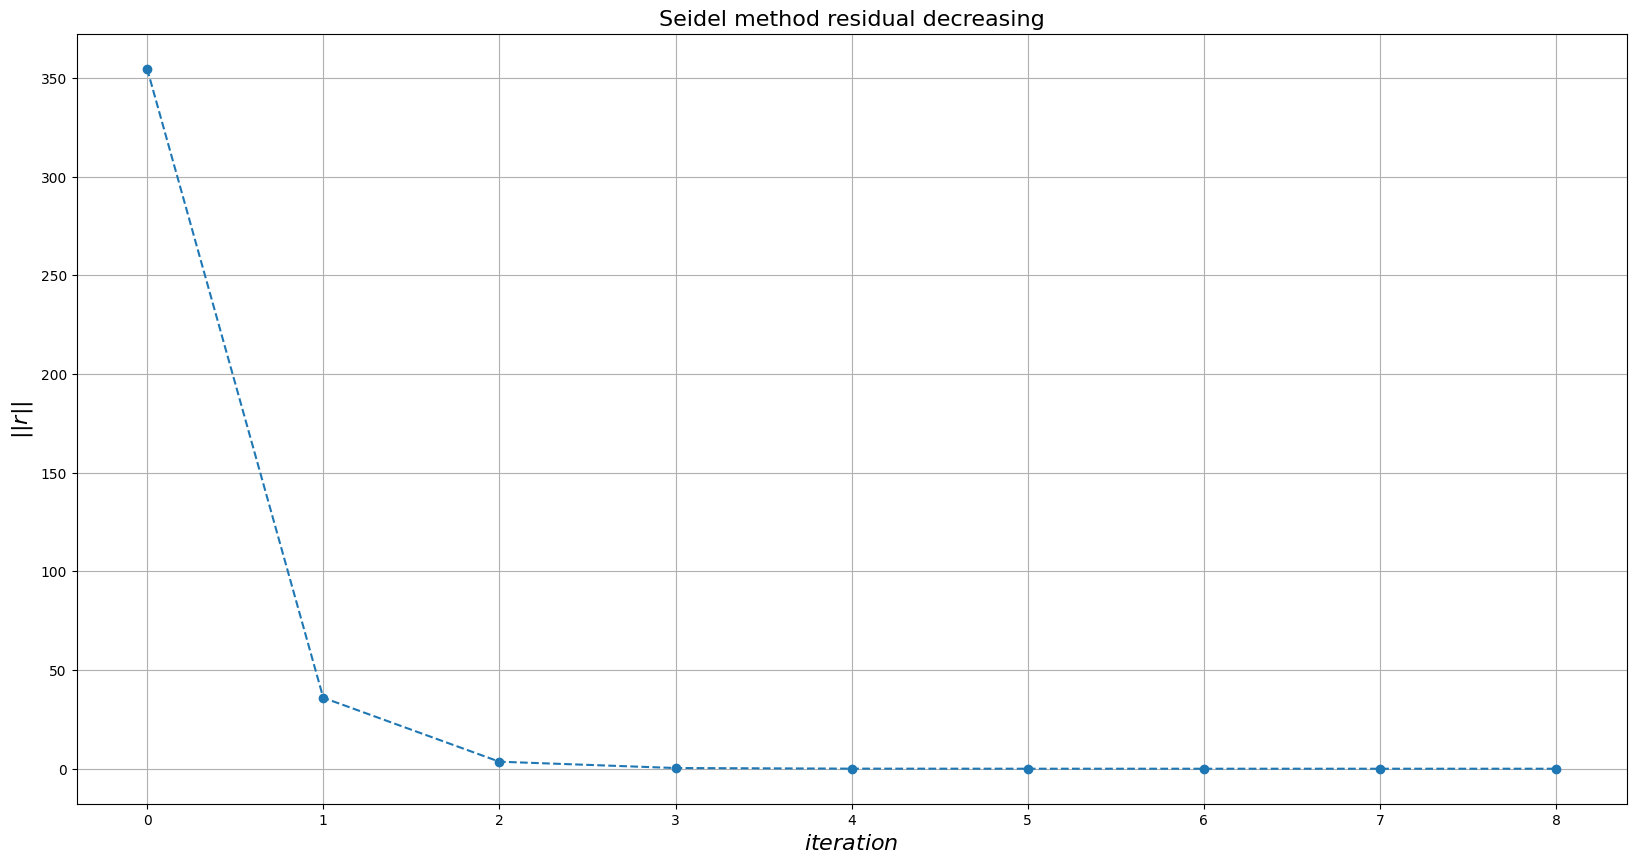

In [14]:
makePlot(rs, "Seidel method residual decreasing")

## Jacobi

In [15]:
def solveJacobi(A, f, n, delta_th):
    A = np.matrix(A)
    f = np.matrix(f)

    i, j = np.indices(A.shape)
    X = np.matrix(np.zeros((n + 1, 1)))
    D = np.matrix(np.zeros((n + 1, n + 1)))
    D[i, i] = A[i, i]
    R = A - D
    rs = list()

    while True:
        prev_X = np.matrix(X)

        X = np.linalg.inv(D) * (f - R * X)

        rs.append(calcResidual(A, f, X))
        if normVector(X - prev_X) < delta_th:
            break

    return X, np.array(rs)

In [16]:
solution, rs = solveJacobi(A, f, n, 1e-5)
solution

matrix([[ 8.33333333e-02],
        [ 1.66666667e-01],
        [ 2.50000000e-01],
        [ 3.33333333e-01],
        [ 4.16666667e-01],
        [ 5.00000000e-01],
        [ 5.83333333e-01],
        [ 6.66666667e-01],
        [ 7.50000000e-01],
        [ 8.33333333e-01],
        [ 9.16666667e-01],
        [ 1.00000000e+00],
        [ 1.08333333e+00],
        [ 1.16666667e+00],
        [ 1.25000000e+00],
        [ 1.33333333e+00],
        [ 1.41666667e+00],
        [ 1.50000000e+00],
        [ 1.58333333e+00],
        [ 1.66666667e+00],
        [ 1.75000000e+00],
        [ 1.83333333e+00],
        [ 1.91666667e+00],
        [ 2.00000000e+00],
        [ 2.08333333e+00],
        [ 2.16666667e+00],
        [ 2.25000000e+00],
        [ 2.33333333e+00],
        [ 2.41666667e+00],
        [ 2.50000000e+00],
        [ 2.58333333e+00],
        [ 2.66666667e+00],
        [ 2.75000000e+00],
        [ 2.83333333e+00],
        [ 2.91666667e+00],
        [ 3.00000000e+00],
        [ 3.08333333e+00],
 

In [17]:
calcResidual(A, f, solution)

6.866713229938019e-06

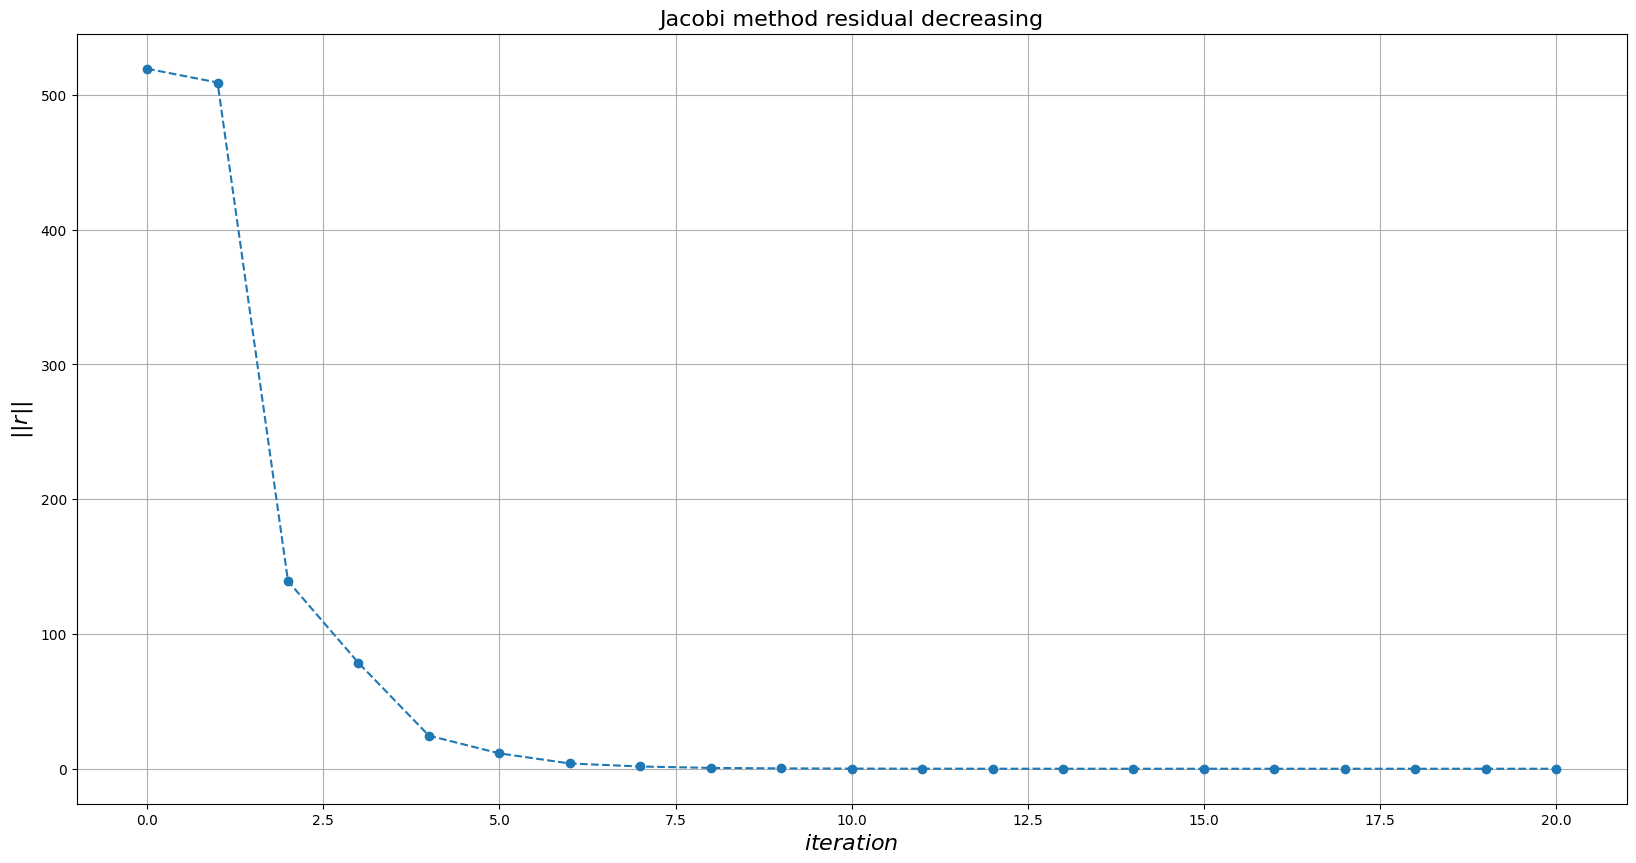

In [18]:
makePlot(rs, "Jacobi method residual decreasing")

## Upper-relaxation

In [19]:
def solveUpperRelaxation(A, f, n, w, delta_th):
    A = np.matrix(A)
    f = np.matrix(f)

    X = np.matrix(np.zeros((n + 1, 1)))
    rs = list()

    while True:
        prev_X = np.matrix(X)

        for i in range(n + 1):
            row_sum = A[i, :i] * X[:i] + A[i, i + 1:] * X[i + 1:]
            X[i] = (1 - w) * prev_X[i] + w * (f[i] - row_sum) / A[i, i]

        rs.append(calcResidual(A, f, X))
        if normVector(X - prev_X) < delta_th:
            break

    return X, np.array(rs)

In [20]:
solution, rs = solveUpperRelaxation(A, f, n, 1.2, 1e-6)
solution

matrix([[ 8.33333339e-02],
        [ 1.66666667e-01],
        [ 2.50000001e-01],
        [ 3.33333334e-01],
        [ 4.16666667e-01],
        [ 5.00000001e-01],
        [ 5.83333334e-01],
        [ 6.66666667e-01],
        [ 7.50000001e-01],
        [ 8.33333334e-01],
        [ 9.16666668e-01],
        [ 1.00000000e+00],
        [ 1.08333333e+00],
        [ 1.16666667e+00],
        [ 1.25000000e+00],
        [ 1.33333333e+00],
        [ 1.41666667e+00],
        [ 1.50000000e+00],
        [ 1.58333333e+00],
        [ 1.66666667e+00],
        [ 1.75000000e+00],
        [ 1.83333333e+00],
        [ 1.91666667e+00],
        [ 2.00000000e+00],
        [ 2.08333333e+00],
        [ 2.16666667e+00],
        [ 2.25000000e+00],
        [ 2.33333334e+00],
        [ 2.41666667e+00],
        [ 2.50000000e+00],
        [ 2.58333334e+00],
        [ 2.66666667e+00],
        [ 2.75000000e+00],
        [ 2.83333334e+00],
        [ 2.91666667e+00],
        [ 3.00000000e+00],
        [ 3.08333334e+00],
 

In [21]:
calcResidual(A, f, solution)

1.2727567655401674e-06

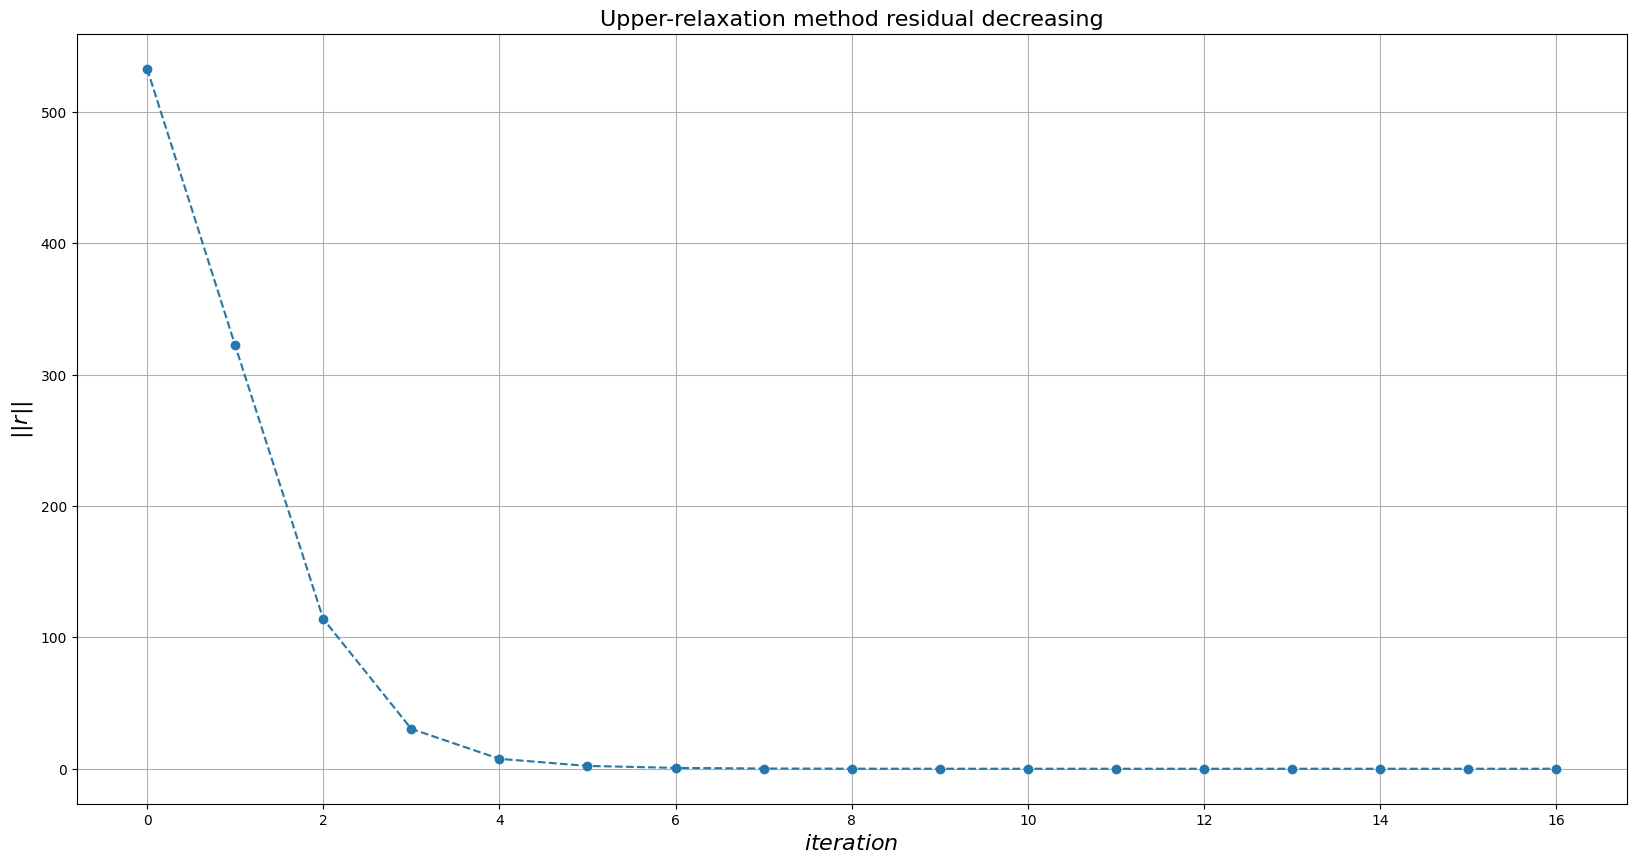

In [22]:
makePlot(rs, "Upper-relaxation method residual decreasing")